## Qualitative Benchmark

**Goal** Collect evidence that electron density derived descriptors improve upon molecular fingerprints

**Hypothesis** Fingerprints rely on atom types, but EDs encode function. Hence, similar functioning molecules should receive a more similar fingerprint.

### Conclusion

Changes in circular fingerprints are far less predictive than I thought. We should first try to optimize a functional task like QSAR and QSPR and then try to understand why something got better.

In [3]:
# Load mols

import csv
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Draw
from matplotlib import pyplot as plt

quality_benchmark = {}

fpgen = AllChem.GetRDKitFPGenerator()

with open('data/qualitative_benchmark/molecules.csv') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=';', )
    for row in reader:
        print(row['name'], row['description'])
        name = row['name']
        mol = Chem.MolFromSmiles( row['smiles'] )
        fp = fpgen.GetFingerprint(mol)
        quality_benchmark[ name ] = {
            'mol' : mol,
            'fp' : fp
        }

bsc Basic
blc Longer center
blm Longer moiety
oxc Oxygen center
nic Nitrogen center
nim Nitrogen moiety
oxm Oxygen moiety
flm Fluorine moiety
clm Chlorine moiety
brm Bromine moiety
iom Iodine moiety


In [4]:
def compare_two_sets(candidates_x, candidates_y):
    mol_matrix = [[None]]
    legends_Matrix = [[""]]

    mol_matrix[0].extend( [quality_benchmark[x]['mol'] for x in candidates_x] )
    legends_Matrix[0].extend( [x for x in candidates_x] )
    for y in candidates_y:
        mol_row = [quality_benchmark[y]['mol']]
        legend_row = [y]
        for _ in range(len(candidates_x)):
            mol_row.append(Chem.MolFromSmiles('CC'))
            legend_row.append('NaN')
        mol_matrix.append(mol_row)
        legends_Matrix.append(legend_row)

    for xi, x in enumerate(candidates_x):
        for yi, y in enumerate(candidates_y):
            sim = DataStructs.TanimotoSimilarity(quality_benchmark[x]['fp'], quality_benchmark[y]['fp'])
            print(x, y, sim)
            legends_Matrix[yi+1][xi+1] = f'{sim:.4f}'


    all_candidates = candidates_x + candidates_y
    img=Draw.MolsMatrixToGridImage(mol_matrix,subImgSize=(200,200), legendsMatrix=legends_Matrix)   
    plt.figure(figsize=(2*(1+len(candidates_x)), 2*(1+len(candidates_y))))
    plt.axis('off')
    plt.imshow(img) 

blc bsc 0.4642857142857143
blm bsc 0.9854368932038835


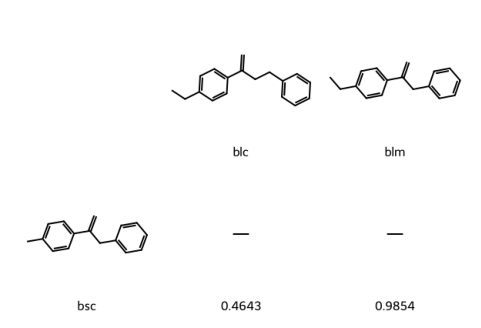

In [5]:
# Position Test - Fingerprints will change more depending on position of change

candidates_x = ['blc', 'blm']
candidates_y = ['bsc', ]

compare_two_sets(candidates_x, candidates_y)

### Result

As expected, the change in the center of the molecule has way more impact than on the moiety

blm bsc 0.9854368932038835
oxm bsc 0.8675213675213675
nim bsc 0.871244635193133
blc bsc 0.4642857142857143
oxc bsc 0.40893470790378006
nic bsc 0.39372822299651566


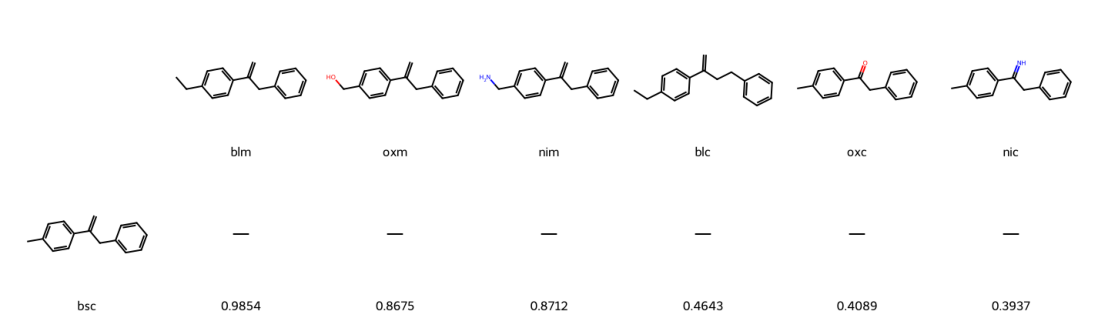

In [6]:
# Atom Type Test - Fingerprints will change the same independet of the atom type

candidates_x = ['blm', 'oxm', 'nim', 'blc', 'oxc', 'nic']
candidates_y = ['bsc', ]

compare_two_sets(candidates_x, candidates_y)

### Results

Mixed. For moieties it is true, the change is independent of the atom type. For the central changes however things look quite different.

blm blm 1.0
blm oxm 0.8565400843881856
blm nim 0.8601694915254238
oxm blm 0.8565400843881856
oxm oxm 1.0
oxm nim 0.7689393939393939
nim blm 0.8601694915254238
nim oxm 0.7689393939393939
nim nim 1.0


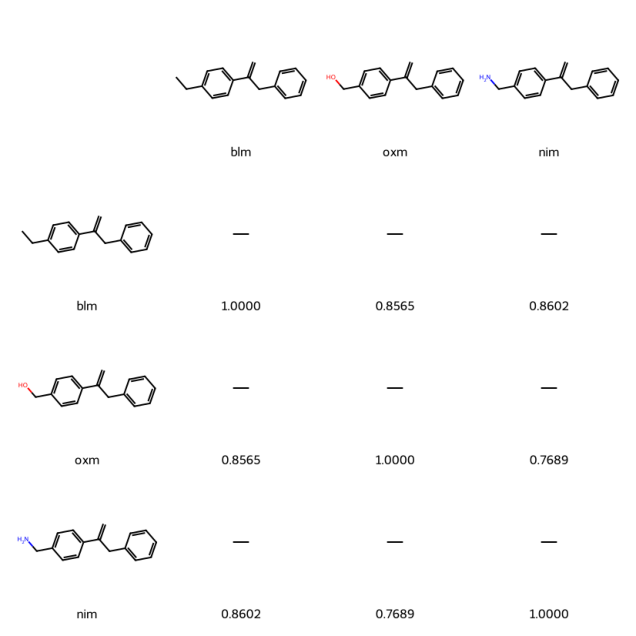

In [7]:
# Atom Type Test - Fingerprints will change the same independet of the atom type

candidates_x = ['blm', 'oxm', 'nim', ]
candidates_y = ['blm', 'oxm', 'nim', ]

compare_two_sets(candidates_x, candidates_y)

blc blc 1.0
blc oxc 0.27384615384615385
blc nic 0.27044025157232704
oxc blc 0.27384615384615385
oxc oxc 1.0
oxc nic 0.378839590443686
nic blc 0.27044025157232704
nic oxc 0.378839590443686
nic nic 1.0


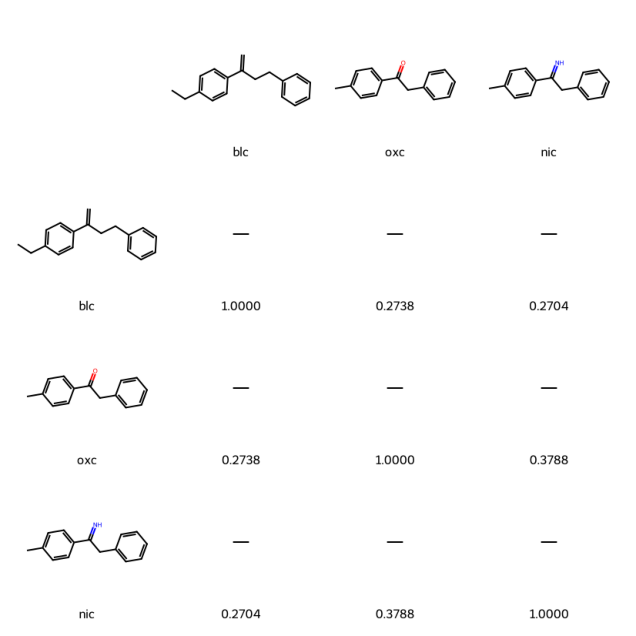

In [8]:
# Atom Type Test - Fingerprints will change the same independet of the atom type

candidates_x = ['blc', 'oxc', 'nic', ]
candidates_y = ['blc', 'oxc', 'nic', ]

compare_two_sets(candidates_x, candidates_y)

### Results

The pattern repeats. For moieties the change is independent of the atom type, but not for the central change.

blm bsc 0.9854368932038835
flm bsc 0.8675213675213675
clm bsc 0.8601694915254238
brm bsc 0.8675213675213675
iom bsc 0.8601694915254238


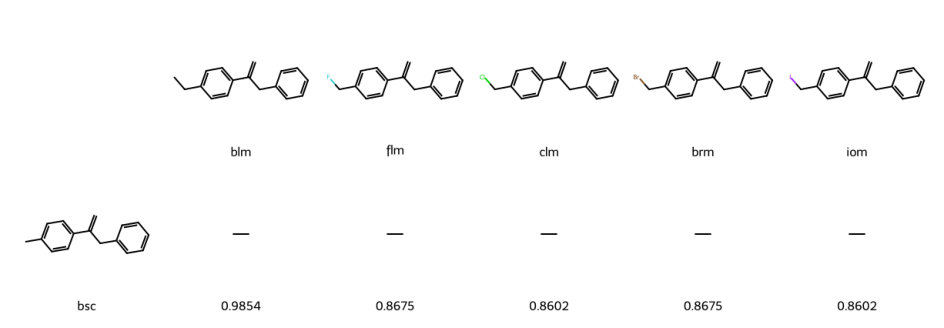

In [33]:
# Atom Type Test - Fingerprints will change the same independet of the atom type

candidates_x = ['blm', 'flm', 'clm', 'brm', 'iom', ]
candidates_y = ['bsc', ]

compare_two_sets(candidates_x, candidates_y)

blm blm 1.0
blm flm 0.8565400843881856
blm clm 0.8493723849372385
blm brm 0.8565400843881856
blm iom 0.8493723849372385
flm blm 0.8565400843881856
flm flm 1.0
flm clm 0.7602996254681648
flm brm 0.7660377358490567
flm iom 0.7669172932330827
clm blm 0.8493723849372385
clm flm 0.7602996254681648
clm clm 1.0
clm brm 0.7602996254681648
clm iom 0.7611940298507462
brm blm 0.8565400843881856
brm flm 0.7660377358490567
brm clm 0.7602996254681648
brm brm 1.0
brm iom 0.7602996254681648
iom blm 0.8493723849372385
iom flm 0.7669172932330827
iom clm 0.7611940298507462
iom brm 0.7602996254681648
iom iom 1.0


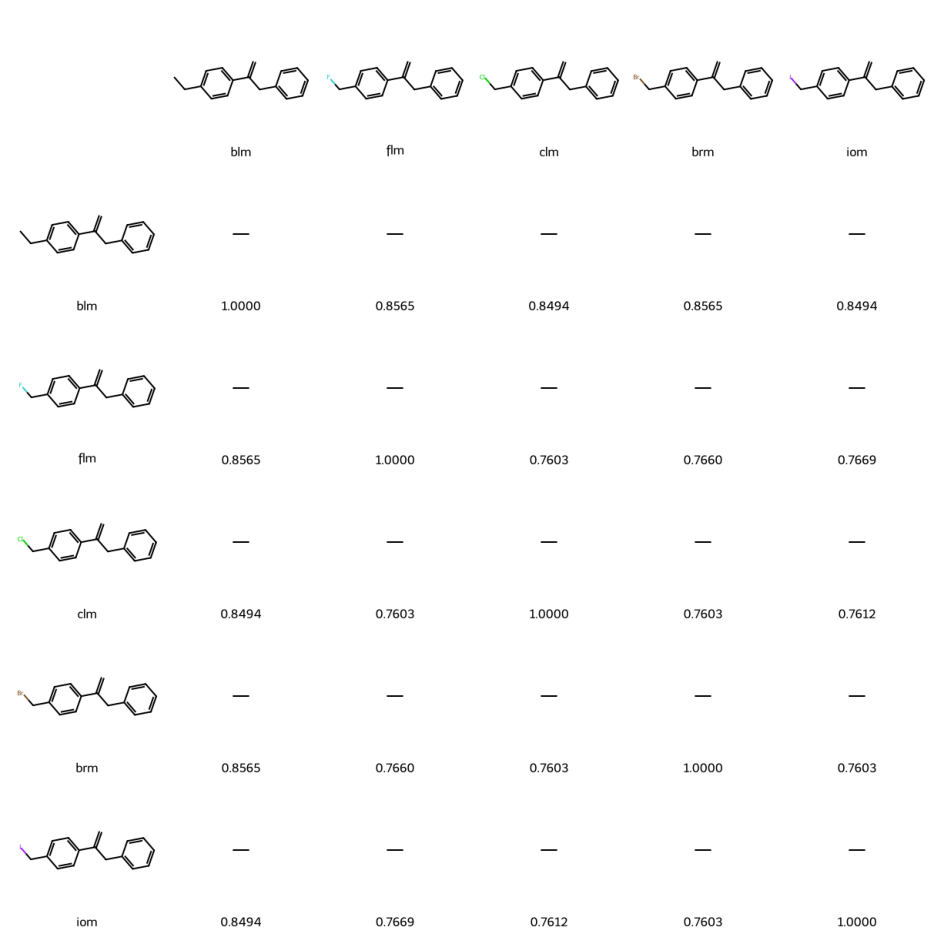

In [34]:
# Atom Type Test - Fingerprints will change the same independet of the atom type

candidates_x = ['blm', 'flm', 'clm', 'brm', 'iom', ]
candidates_y = ['blm', 'flm', 'clm', 'brm', 'iom', ]

compare_two_sets(candidates_x, candidates_y)

### Results

And I also works for halogenes